In [51]:
import pandas as pd
import numpy as np
import plotnine
from plotnine import *
%matplotlib inline

In [2]:
#Let's also mess around with 3d graphics this time

!pip install plotnine3d

In [3]:
from plotnine3d import *

## Load gapminder

In [4]:
g_url='https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder-FiveYearData.csv'

gapminder=pd.read_csv(g_url)

In [5]:
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [6]:
plotnine.options.figure_size = (9, 6)

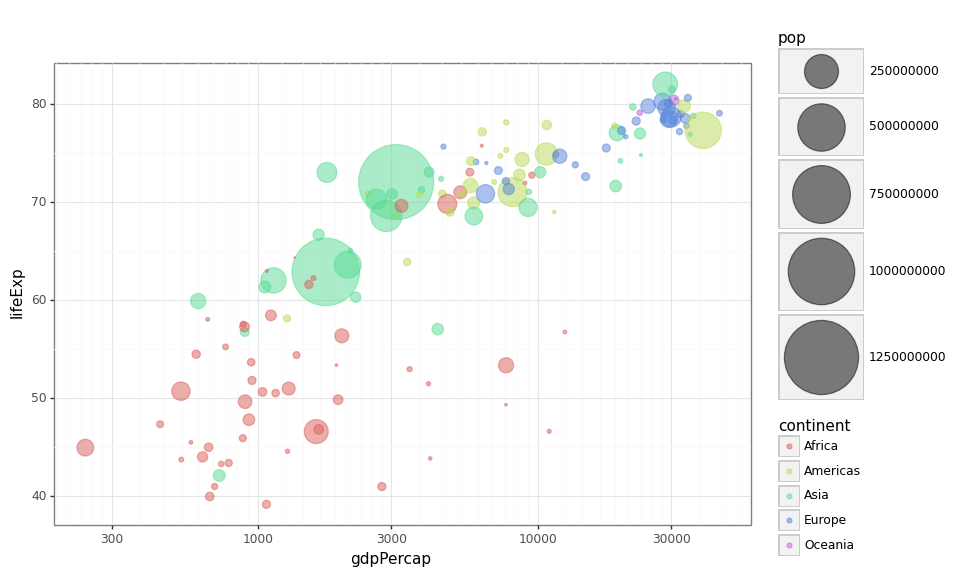

<ggplot: (8765978038375)>

In [7]:
#Current state of our plots

(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 scale_size(range = [0.1, 30])+
 theme_bw()
)



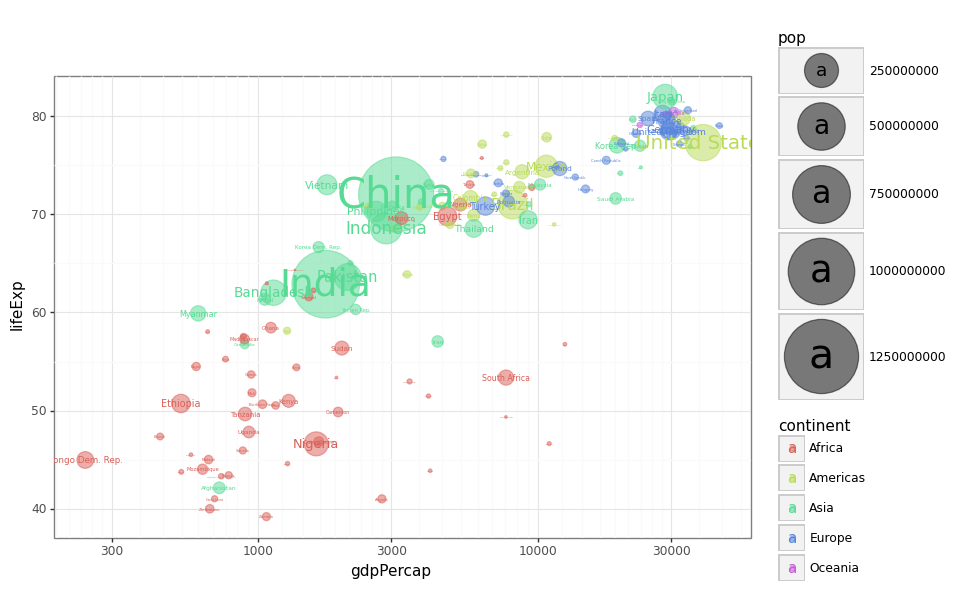

<ggplot: (8766029225180)>

In [8]:
# Let's add the country names

(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 scale_size(range = [0.1, 30])+
 theme_bw()+
geom_text(aes(x='gdpPercap', y='lifeExp', label='country'))

)


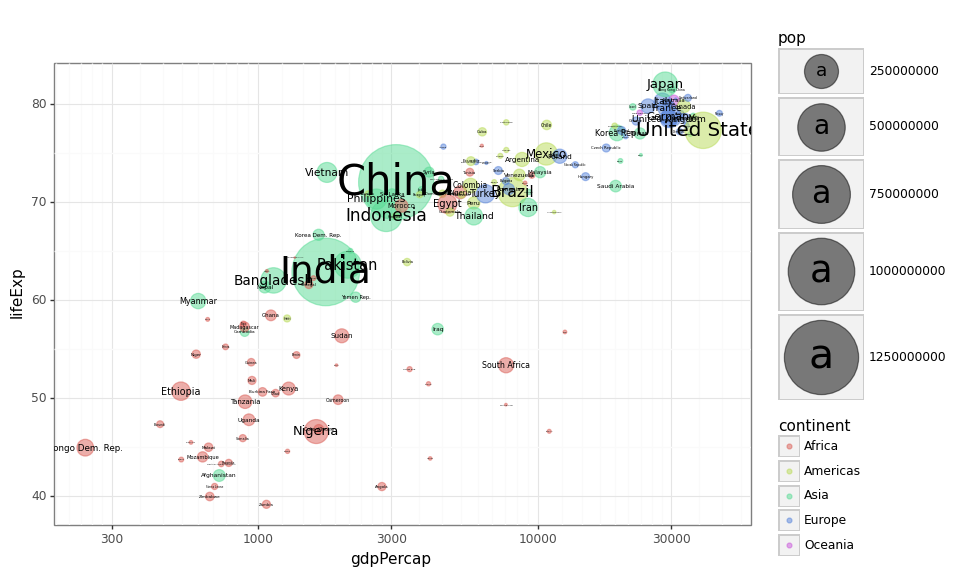

<ggplot: (8765998520555)>

In [9]:
#This is a bit off, let's change the color

# Let's add the country names

(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 scale_size(range = [0.1, 30])+
 theme_bw()+
geom_text(aes(x='gdpPercap', y='lifeExp', label='country'),
         color='black')

)


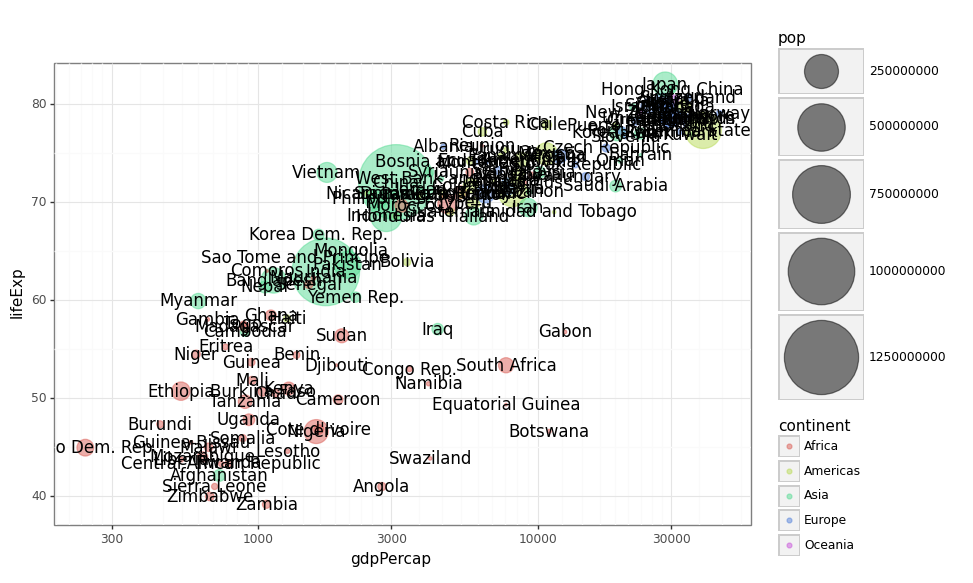

<ggplot: (8766011997230)>

In [10]:
# I don't really like the fact that the size of text changes 

#This is a bit off, let's change the color

# Let's add the country names

(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 scale_size(range = [0.1, 30])+
 theme_bw()+
geom_text(aes(x='gdpPercap', y='lifeExp', label='country'),
         color='black', size=12)

)


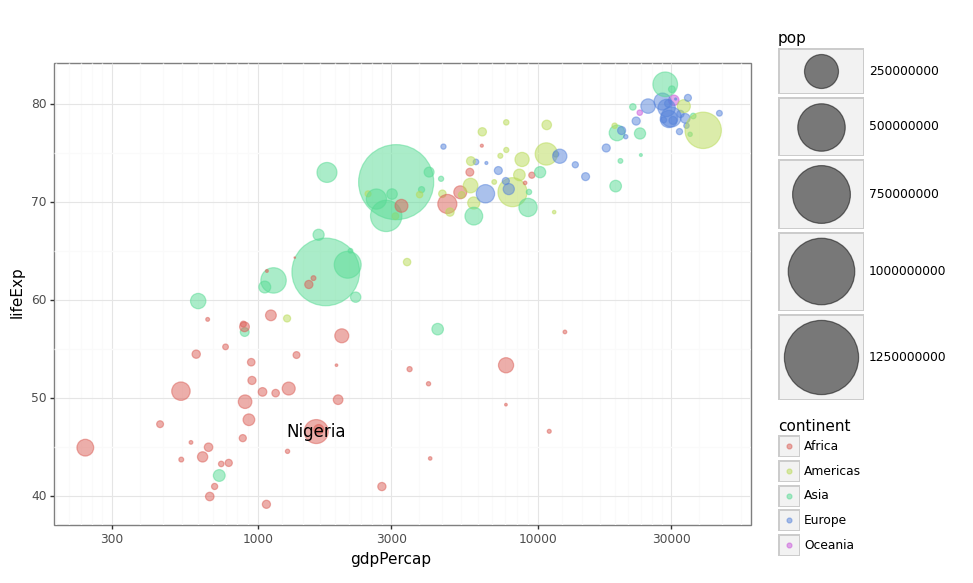

<ggplot: (8765978262604)>

In [14]:
#OK.... I don't quite like it... let's do some work to use only
#  Nigeria and the US
# To start, just do Nigeria!

# For using multiple statements we can use
# "AND" (&) and "OR" (|) statements

# Let's add the country names

(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 scale_size(range = [0.1, 30])+
 theme_bw()+
geom_text(aes(x='gdpPercap', y='lifeExp', label='country'),
         color='black', size=12,
         data=gapminder.loc[(gapminder['year']==2002)
                           & (gapminder['country']=='Nigeria')]
          
          #data=gapminder.loc[gapminder['country']=='Nigeria']
         )

)
 


In [12]:
gapminder.loc[(gapminder['year']==2002) & (gapminder['country']=='Nigeria')]

,country,year,pop,continent,lifeExp,gdpPercap
1138,Nigeria,2002,119901274.0,Africa,46.608,1615.286395


In [18]:
# OK, now I would like to add the United states!
#But how do I write the condition?

gapminder.loc[(gapminder['year']==2002)
                           & (gapminder['country']=='Nigeria')|

              (gapminder['country']=='United States')]

,country,year,pop,continent,lifeExp,gdpPercap
1138,Nigeria,2002,119901274.0,Africa,46.608,1615.286395
1608,United States,1952,157553000.0,Americas,68.440,13990.482080
1609,United States,1957,171984000.0,Americas,69.490,14847.127120
1610,United States,1962,186538000.0,Americas,70.210,16173.145860
1611,United States,1967,198712000.0,Americas,70.760,19530.365570
1612,United States,1972,209896000.0,Americas,71.340,21806.035940
1613,United States,1977,220239000.0,Americas,73.380,24072.632130
1614,United States,1982,232187835.0,Americas,74.650,25009.559140
1615,United States,1987,242803533.0,Americas,75.020,29884.350410
1616,United States,1992,256894189.0,Americas,76.090,32003.932240


In [19]:
#Not quite! Let's try this


gapminder.loc[((gapminder['year']==2002)
                           & (gapminder['country']=='Nigeria'))|
             (gapminder['year']==2002) &
              (gapminder['country']=='United States')]

,country,year,pop,continent,lifeExp,gdpPercap
1138,Nigeria,2002,119901274.0,Africa,46.608,1615.286395
1618,United States,2002,287675526.0,Americas,77.310,39097.099550


In [ ]:
gapminder.loc[(gapminder['year']==2002) & (gapminder['country'].isin(['Nigeria', 'United States']))]

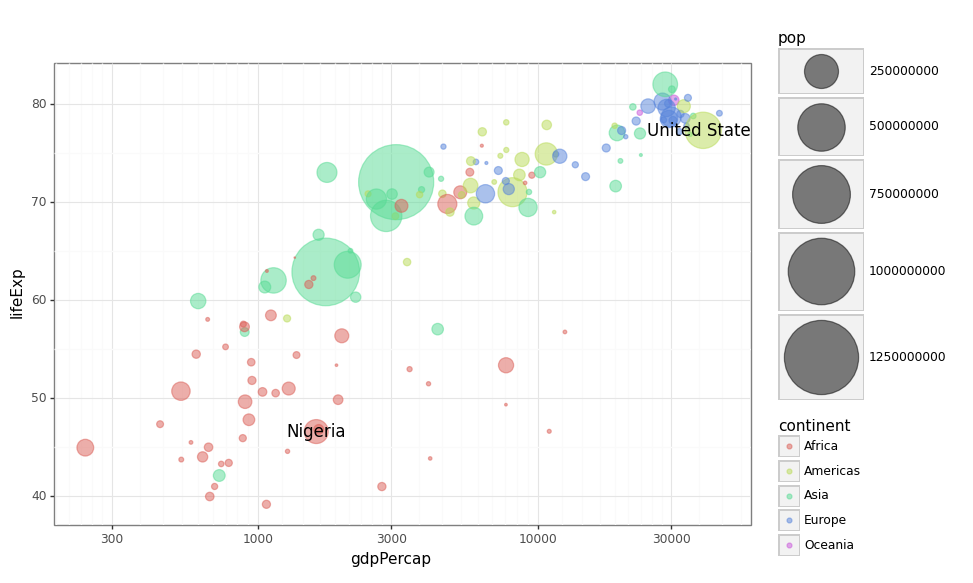

<ggplot: (8765978281876)>

In [20]:
(ggplot(data=gapminder.loc[gapminder['year']==2002], mapping=aes(x='gdpPercap', y='lifeExp',
                                                                 color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 scale_size(range = [0.1, 30])+
 theme_bw()+
geom_text(aes(x='gdpPercap', y='lifeExp', label='country'),
         color='black', size=12,
         data=
gapminder.loc[((gapminder['year']==2002)
                           & (gapminder['country']=='Nigeria'))|
             (gapminder['year']==2002) &
              (gapminder['country']=='United States')]         )

)


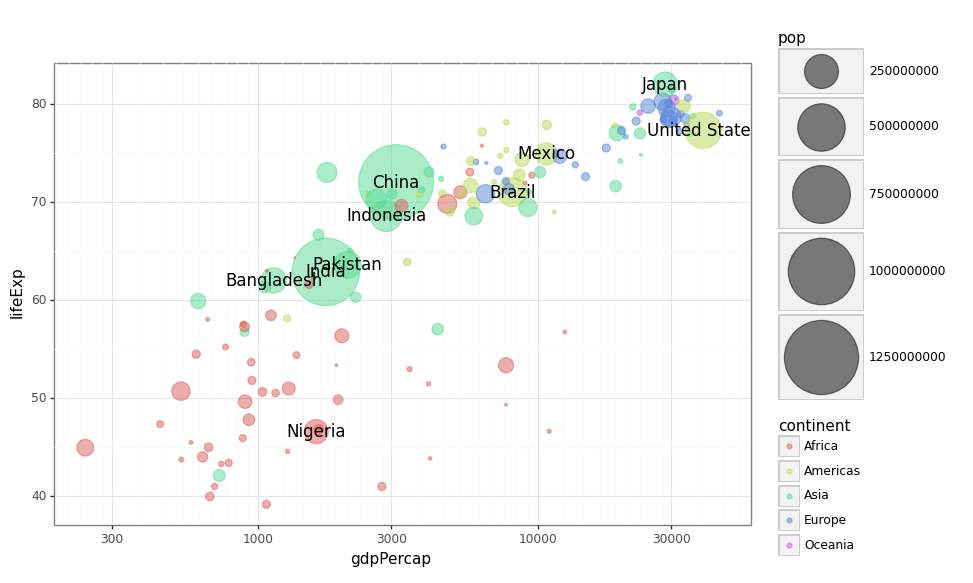

<ggplot: (8766013413051)>

In [21]:
#we can add more, such as adding countries with 
#population over 100 million people, 
#but the command would get too complicated
#Let's try to be smart. We just want year 2002

dfplot=gapminder.loc[gapminder['year']==2002]


(ggplot(data=dfplot, mapping=aes(x='gdpPercap', y='lifeExp',
                             color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 scale_size(range = [0.1, 30])+
 theme_bw()+
geom_text(aes(x='gdpPercap', y='lifeExp', label='country'),
         color='black', size=12,
         data=dfplot.loc[(dfplot['country']=='Nigeria')|
                        (dfplot['country']=='United States')|
                        (dfplot['pop']>1e8)
                        ]   
         )

)

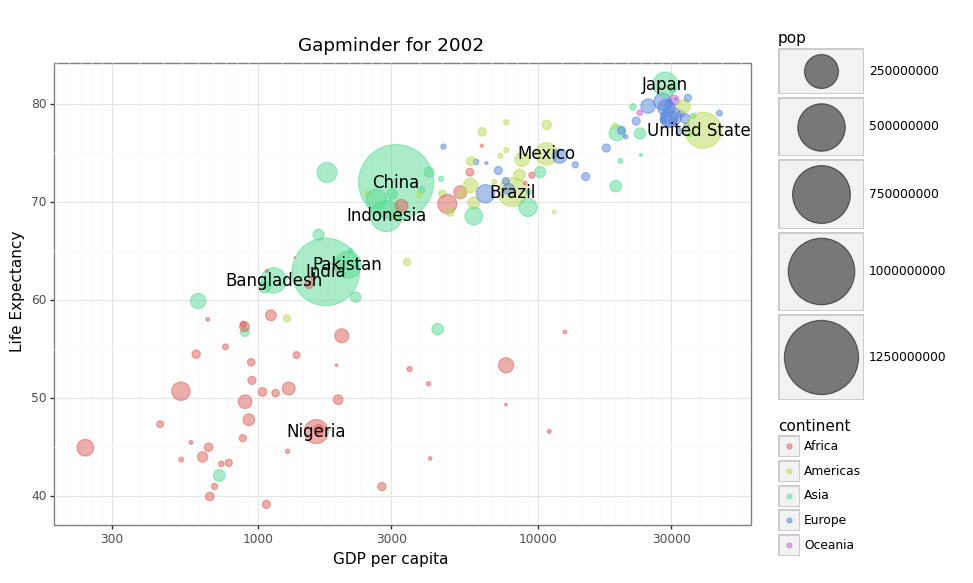

<ggplot: (8766013417789)>

In [22]:
#Let's add some nice title and axes and then
#let's make a function we can cycle over all years
# We will use those to animate

dfplot=gapminder.loc[gapminder['year']==2002]


(ggplot(data=dfplot, mapping=aes(x='gdpPercap', y='lifeExp',
                             color='continent',size='pop')) +
        geom_point(alpha = 0.5)+
 scale_x_log10()+
 
 scale_size(range = [0.1, 30])+
 theme_bw()+
geom_text(aes(x='gdpPercap', y='lifeExp', label='country'),
         color='black', size=12,
         data=dfplot.loc[(dfplot['country']=='Nigeria')|
                        (dfplot['country']=='United States')|
                        (dfplot['pop']>1e8)
                        ]   
         )+
 ggtitle('Gapminder for 2002')+
 xlab('GDP per capita')+
 ylab('Life Expectancy')

)


In [24]:
# We need to create some locked ranges for 
#the aces to animate


ranges=gapminder.agg(["min", "max"])

ylims= tuple(ranges['lifeExp'])
xlims= tuple(ranges['gdpPercap'])
size_lims = tuple(ranges["pop"])


In [23]:
gapminder.agg(["min", "max"])


,country,year,pop,continent,lifeExp,gdpPercap
min,Afghanistan,1952,6.001100e+04,Africa,23.599,241.165876
max,Zimbabwe,2007,1.318683e+09,Oceania,82.603,113523.132900


In [25]:
#Let's look at each of these:
ylims

(23.599, 82.603)

In [26]:
xlims

(241.1658765, 113523.1329)

In [27]:
size_lims

(60011.0, 1318683096.0)

In [28]:
years=gapminder['year'].unique().tolist()

In [29]:
#Make a function

def plotmaker( year, 
              ylims=ylims,
              xlims=xlims, 
              size_lims=size_lims):
    dfplot=gapminder.loc[gapminder['year']==year]


    p=(ggplot(data=dfplot, mapping=aes(x='gdpPercap', y='lifeExp',
                                 color='continent',size='pop')) +
       #the dots
            geom_point(alpha = 0.5)+
       
       #we make sure that all of our axes and dots stay within the limits we set
    scale_size(range = [0.1, 30], limits = size_lims)+
       scale_x_log10(limits = xlims, minor_breaks = [])+
       scale_y_continuous(limits = ylims)+
     
       #The theme
     theme_bw()+
       
       #The text!
    geom_text(aes(x='gdpPercap', y='lifeExp', label='country'),
             color='black', size=12,
             data=dfplot.loc[(dfplot['country']=='Nigeria')|
                            (dfplot['country']=='United States')|
                            (dfplot['pop']>1e8)
                            ]   
             )+
       
       #The title
     ggtitle(f"Gapminder for year {str(year)}")+  
       
       #The x axis!
     xlab('GDP per capita')+
       
       #The y axis!
     ylab('Life Expectancy')

    )
    
    return(p)


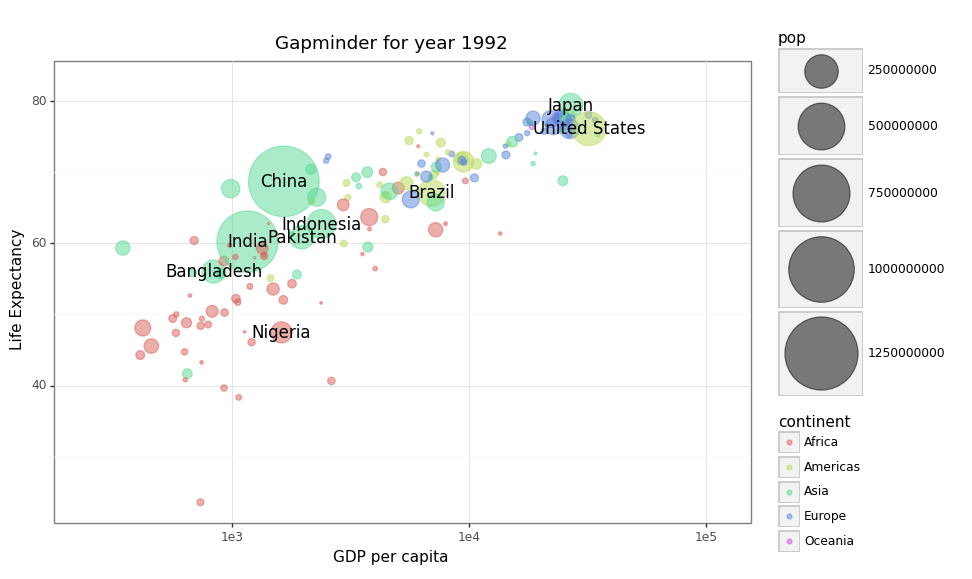

<ggplot: (8766029269005)>

In [31]:
plotmaker( year=1992)

In [32]:
r=34

f'This is number {str(r)}'


'This is number 34'

In [33]:
years=gapminder.year.unique()

In [34]:
# we will create an object called a generator
for k in years:
    plotmaker(year=k).save(f"anigapminder{str(k)}.png")


/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 9 x 6 in image.
/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: anigapminder1952.png
/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 9 x 6 in image.
/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: anigapminder1957.png
/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 9 x 6 in image.
/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: anigapminder1962.png
/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 9 x 6 in image.
/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning:

In [35]:
#Let's get the directory explorer
import imageio as io
import os

In [36]:

file_names = sorted((fn for fn in os.listdir('.') if fn.startswith('anigapminder')))

In [37]:
file_names


['anigapminder1952.png',
 'anigapminder1957.png',
 'anigapminder1962.png',
 'anigapminder1967.png',
 'anigapminder1972.png',
 'anigapminder1977.png',
 'anigapminder1982.png',
 'anigapminder1987.png',
 'anigapminder1992.png',
 'anigapminder1997.png',
 'anigapminder2002.png',
 'anigapminder2007.png']

In [38]:
#This to make a gif!!!

with io.get_writer('gapminder.gif', mode='I', duration=0.5) as writer:
    for filename in file_names:
        image = io.imread(filename)
        writer.append_data(image)
writer.close()

## A few more tricks (mpg dataset)

In [52]:
from plotnine.data import mpg


In [53]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


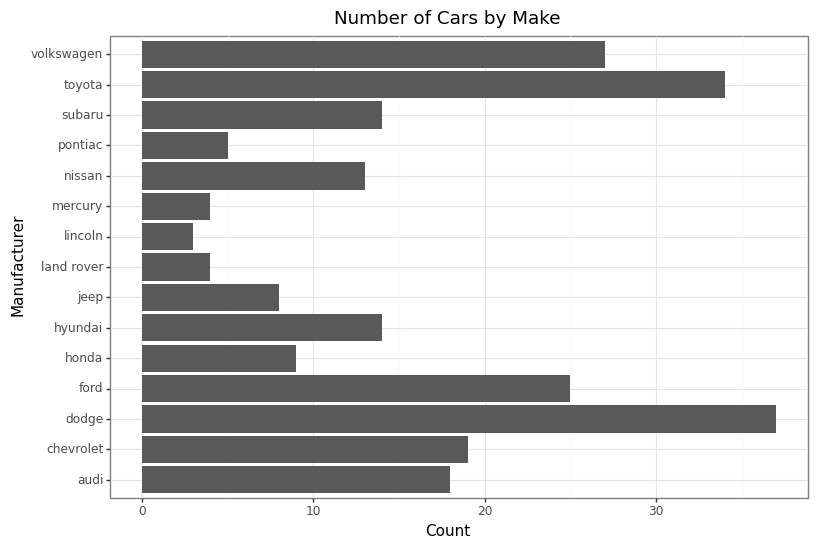

<ggplot: (8766029278874)>

In [54]:
(ggplot(mpg)+
 aes(x='manufacturer')+
 #We can change the bar size!
geom_bar(size=30)+
 coord_flip()+
 labs(y='Count', x='Manufacturer', title='Number of Cars by Make')+
 theme_bw()
)

In [55]:
# I would like to sort this. First let's a sort by value counts

mpg['manufacturer'].value_counts()


dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

Let's turn this value count into a data frame:

In [56]:
sortedman=pd.DataFrame(mpg['manufacturer'].value_counts()).reset_index()

sortedman.columns=['manufacturer', 'counts']

sortedman


,manufacturer,counts
0,dodge,37
1,toyota,34
2,volkswagen,27
3,ford,25
4,chevrolet,19
5,audi,18
6,hyundai,14
7,subaru,14
8,nissan,13
9,honda,9


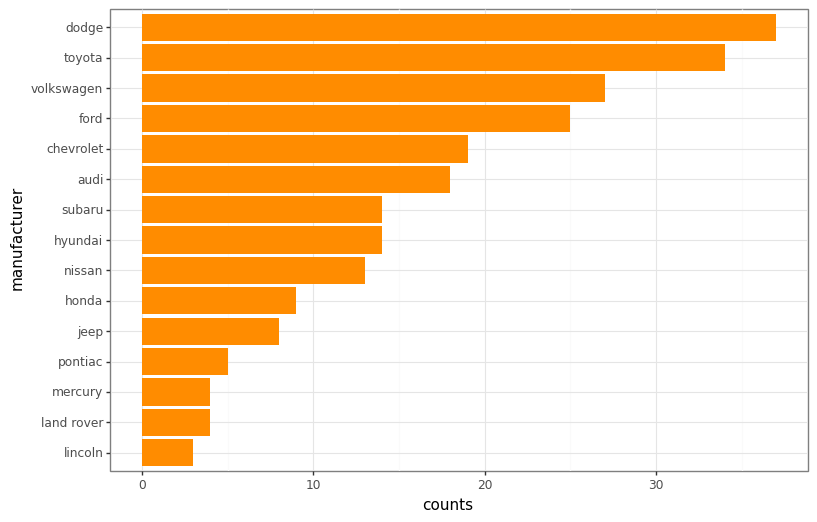

<ggplot: (8765978336925)>

In [57]:
(ggplot(data=sortedman, mapping=aes(x='reorder(manufacturer, counts)', y='counts'))+
geom_bar(stat='identity', fill='darkorange')+
 xlab('manufacturer')+
 ylab('counts')+
 coord_flip()+
theme_bw()
)

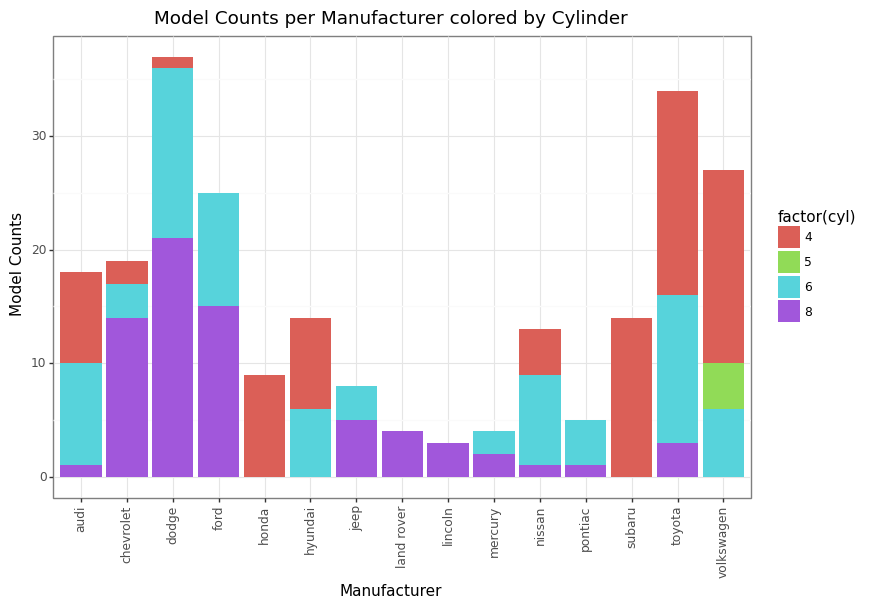

<ggplot: (8765978040167)>

In [58]:
#Let's do stacked bar plots ( we are also gonna change the figure size of this individual plot)

(ggplot(data=mpg, mapping=aes(x="manufacturer", fill="factor(cyl)"))+
 geom_bar()+
 xlab("Manufacturer")+
 ylab("Model Counts")+
 ggtitle("Model Counts per Manufacturer colored by Cylinder")+
 theme(figure_size=(11,5))+
 theme_bw()+
 theme(axis_text_x=element_text(rotation=90))

)

In [59]:
# I am gonna have the audi, chevrolet, dodge and volkswagen, grouped by manufacturer and cylinder

mpg_by_manuf_cyl = mpg.groupby(by=["manufacturer","cyl"]).mean()\
                    .loc[["audi", "chevrolet", "dodge", "volkswagen"]].dropna().reset_index()

mpg_by_manuf_cyl

<ipython-input-59-f7965c5bcd20>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,manufacturer,cyl,displ,year,cty,hwy
0,audi,4,1.900000,2003.500000,19.125000,28.125000
1,audi,6,2.933333,2003.000000,16.444444,25.333333
2,audi,8,4.200000,2008.000000,16.000000,23.000000
3,chevrolet,4,2.400000,2003.500000,20.500000,28.500000
4,chevrolet,6,3.400000,2005.000000,17.666667,27.000000
5,chevrolet,8,5.800000,2004.785714,13.642857,19.857143
6,dodge,4,2.400000,1999.000000,18.000000,24.000000
7,dodge,6,3.600000,2003.200000,15.000000,20.666667
8,dodge,8,5.028571,2005.000000,11.571429,15.714286
9,volkswagen,4,1.958824,2002.176471,22.470588,30.882353


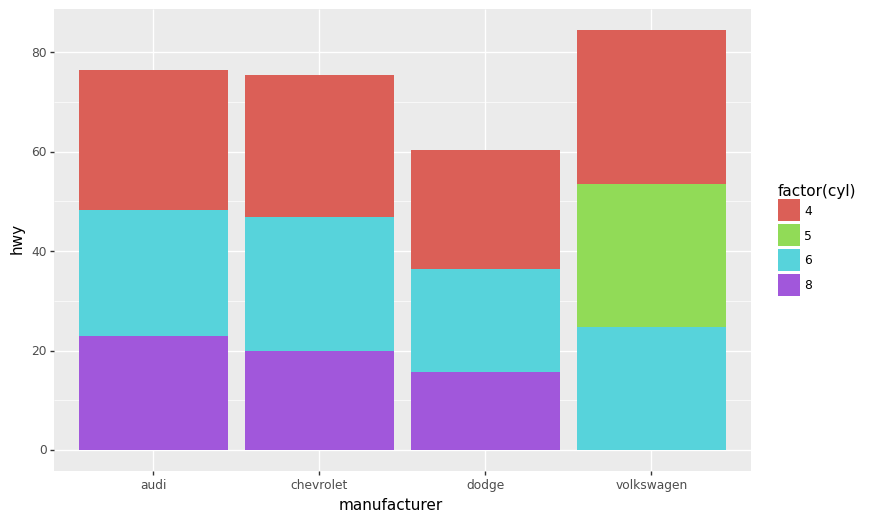

<ggplot: (8765998283858)>

In [60]:
# I want to watch these as separate columns. And I want y to be the highway MPG
# we can start similar, but use geom_col instead of bar (when we have a y axis)


(ggplot(data=mpg_by_manuf_cyl, mapping=aes(x="manufacturer",y='hwy',
                                           fill="factor(cyl)"))+
 geom_col())

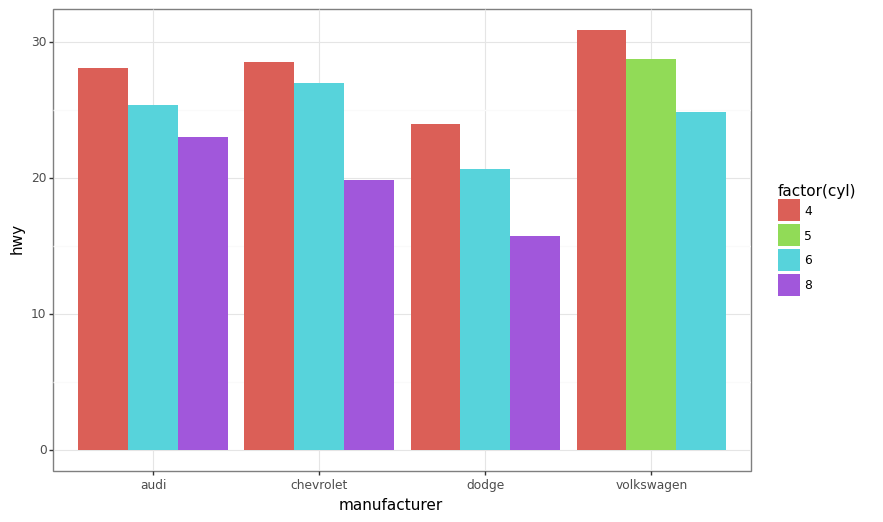

<ggplot: (8766029215910)>

In [61]:
(ggplot(data=mpg_by_manuf_cyl, mapping=aes(x="manufacturer",y='hwy',
                                           fill="factor(cyl)"))+
 geom_col(position='dodge')+
theme_bw())

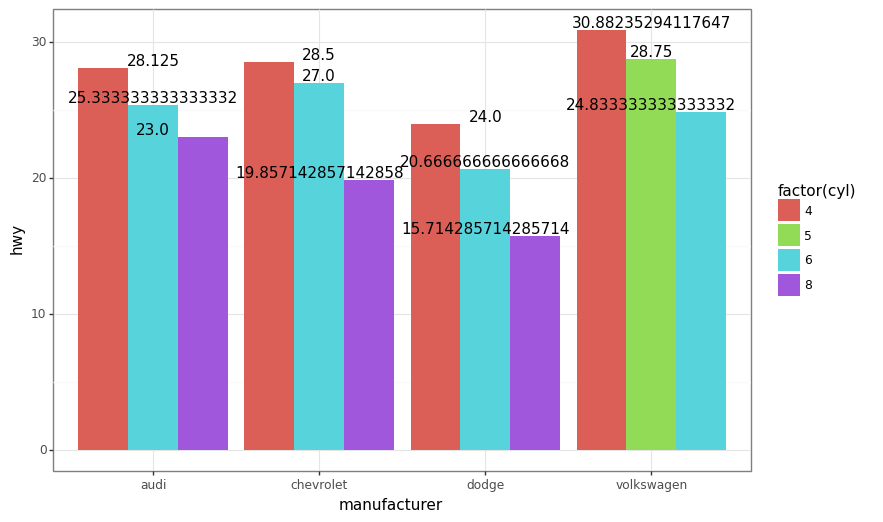

<ggplot: (8766030045194)>

In [62]:
# we can give this some labels on top

(ggplot(data=mpg_by_manuf_cyl, mapping=aes(x="manufacturer",y='hwy', fill="factor(cyl)"))+
 geom_col(position='dodge')+
 geom_text(mapping=aes(label="hwy"),
                  va="bottom")+

 
theme_bw())



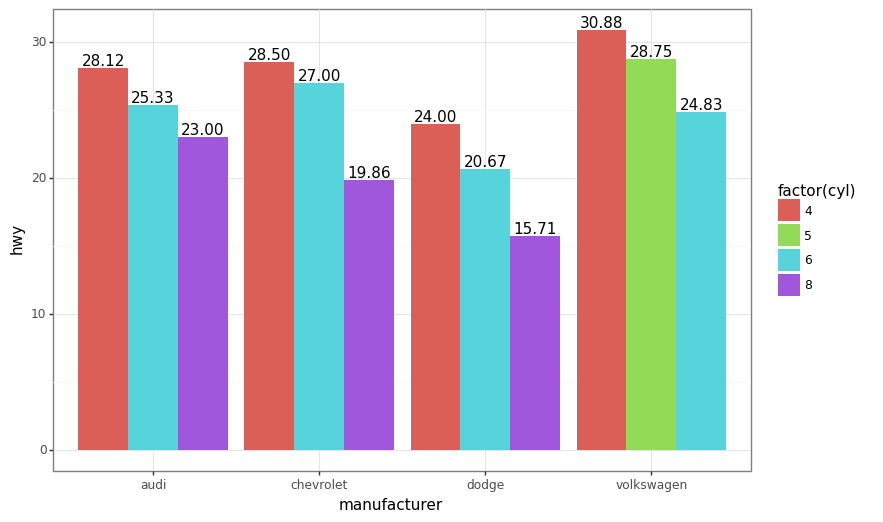

<ggplot: (8766013715336)>

In [63]:
#Maybe we can try that again...

(ggplot(data=mpg_by_manuf_cyl, mapping=aes(x="manufacturer",y='hwy', fill="factor(cyl)"))+
 geom_col(position='dodge')+
 geom_text(mapping=aes(label="hwy"),
           #this means the string in the text we are adding has 2 decimals only
           format_string='{:.2f}',
           #this makes sure that each label is separated and goes to each bar
           position=position_dodge(width=0.9),
                  va="bottom")+

 
theme_bw())

# Some 3D fun

In [64]:
from plotnine.data import mtcars


In [65]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [66]:
#Let's add a column for transmission type
mtcars['transmission'] = mtcars['am'].replace({0: 'automatic', 1: 'manual'})
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,transmission
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,manual
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,manual
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,manual
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,automatic
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,automatic


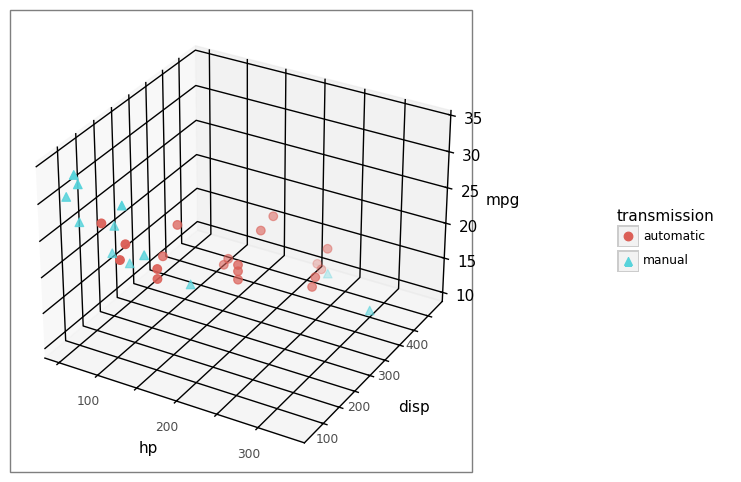

<ggplot: (8765978305549)>

In [67]:
(ggplot_3d(mtcars)
    + aes(
        x='hp', y='disp', z='mpg',
        shape='transmission', color='transmission')+
 geom_point_3d(size=3)+
 theme_bw()
)

Let's add an outline for readability:

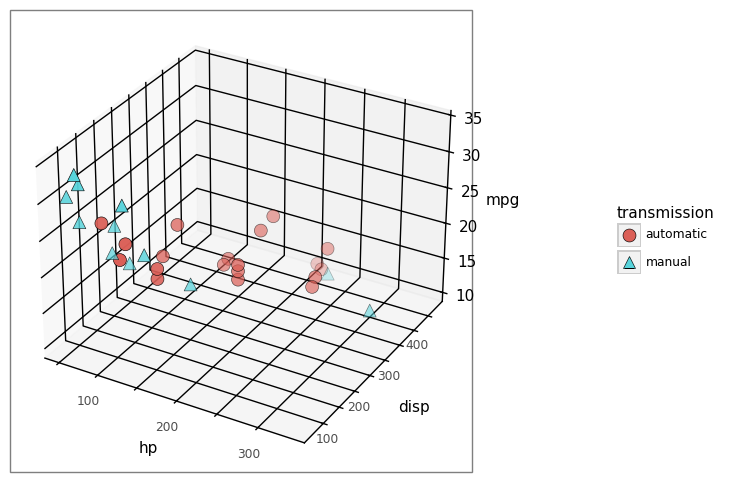

<ggplot: (8766013705620)>

In [68]:
(ggplot_3d(mtcars)
    + aes(
        x='hp', y='disp', z='mpg',
        shape='transmission', fill='transmission')+
 geom_point_3d( stroke=0.25, size=5, color='black')+
 theme_bw()
)

Let's label the cars

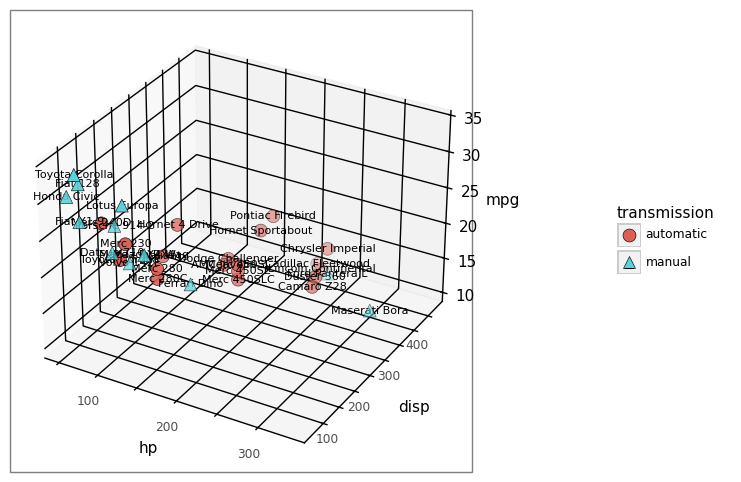

<ggplot: (8766012781704)>

In [69]:
(ggplot_3d(mtcars)
    + aes(
        x='hp', y='disp', z='mpg',
        shape='transmission', fill='transmission')+
 geom_point_3d( stroke=0.25, size=5, color='black')+
 geom_text_3d(aes(label='name'), size=8)+
 theme_bw()
)